  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  Dalc Walc  health  absences_math  G1_math G2_math G3_math failures_por  \
0    1    1       3              6        5       6       6            0   
1    1    1       3              4        5       5       6            0   
2    2    3       3             10        7       8      10            0   
3    1    1       5              2       15      14      15            0   
4    1    2       5              4        6      10      10            0   

  absences_por G3_por  
0            4     11  
1       

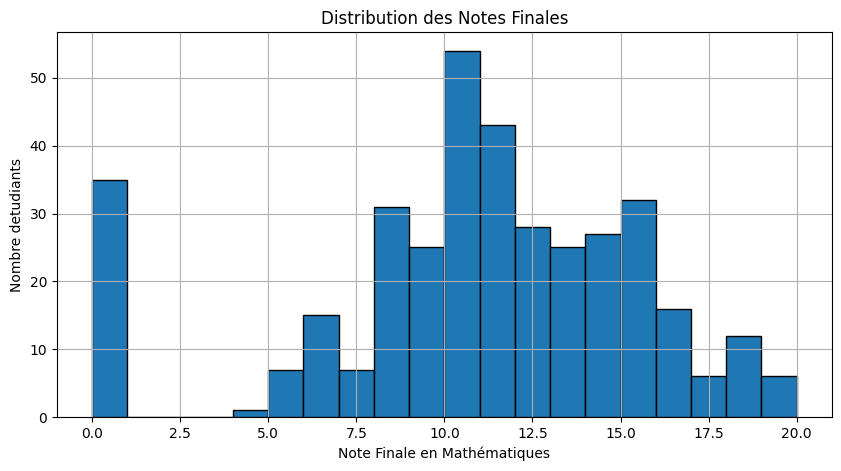

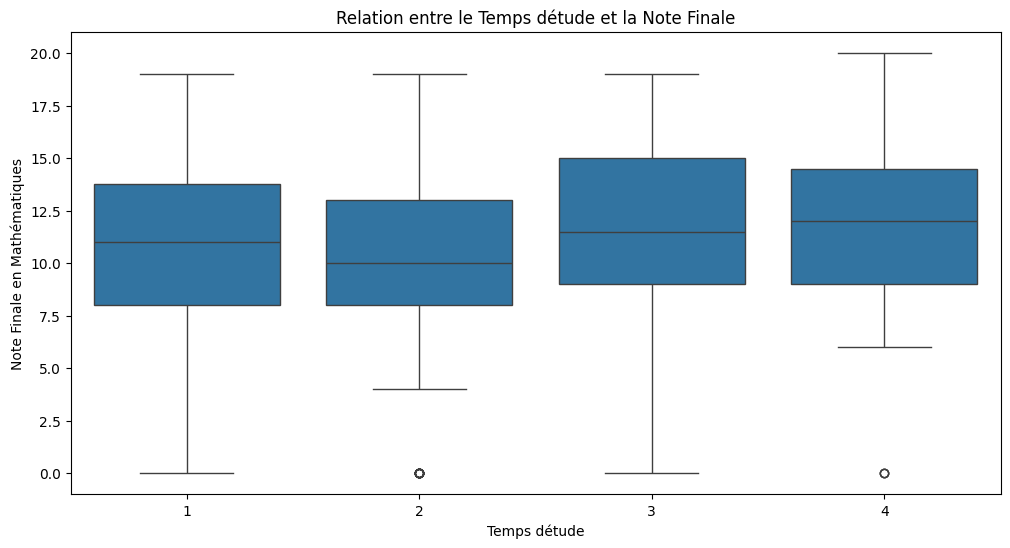

<ipython-input-9-bbb8b903076e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dalc', data=df, palette='Blues')


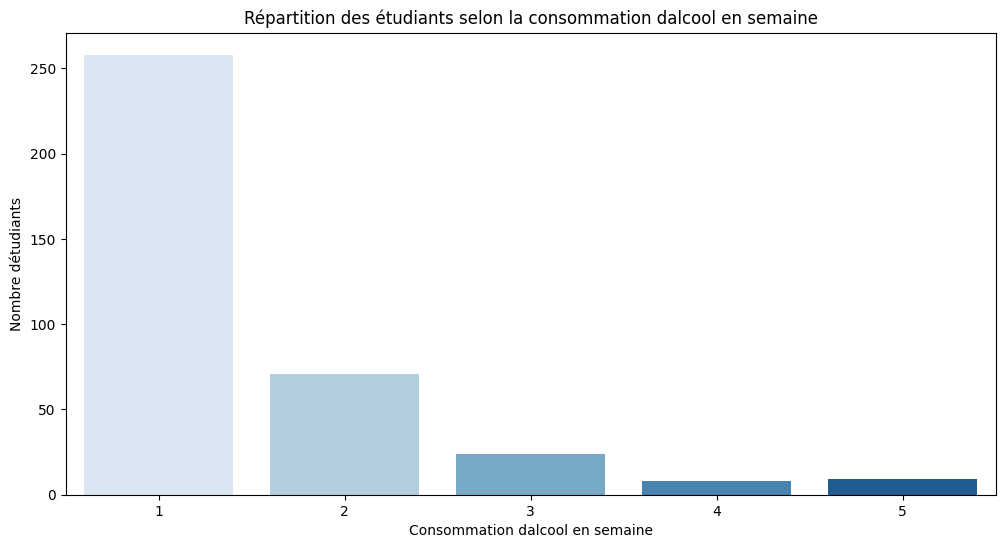

<ipython-input-9-bbb8b903076e>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Walc', data=df, palette='Reds')


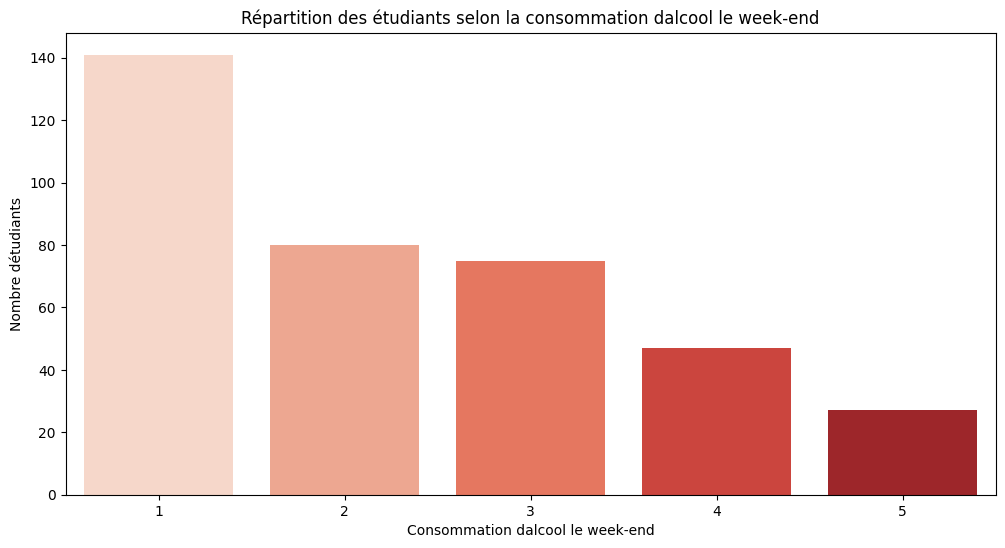

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv('/student_final.csv', sep=';')

# Afficher un aperçu des données
print(df.head())

# Informations générales sur les données
print(df.info())
print(df.describe())

# Vérification des valeurs manquantes
print(df.isnull().sum())

# Distribution des notes finales
df['G3_math'].hist(bins=20, edgecolor='black', figsize=(10, 5))
plt.xlabel('Note Finale en Mathématiques')
plt.ylabel('Nombre detudiants')
plt.title('Distribution des Notes Finales')
plt.show()


# Analyse des relations entre certaines variables et la note finale
plt.figure(figsize=(12, 6))
sns.boxplot(x='studytime', y='G3_math', data=df)
plt.xlabel('Temps détude')
plt.ylabel('Note Finale en Mathématiques')
plt.title('Relation entre le Temps détude et la Note Finale')
plt.show()


# Analyse de la répartition des étudiants selon leur consommation d'alcool
plt.figure(figsize=(12, 6))
sns.countplot(x='Dalc', data=df, palette='Blues')
plt.xlabel('Consommation dalcool en semaine')
plt.ylabel('Nombre détudiants')
plt.title('Répartition des étudiants selon la consommation dalcool en semaine')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Walc', data=df, palette='Reds')
plt.xlabel('Consommation dalcool le week-end')
plt.ylabel('Nombre détudiants')
plt.title('Répartition des étudiants selon la consommation dalcool le week-end')
plt.show()


Dimensions des données : (370, 35)

Variables disponibles :
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures_math', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'failures_por', 'absences_por', 'G3_por']

Exemple de données :
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  Dalc Walc  health  absences_math  G1_mat

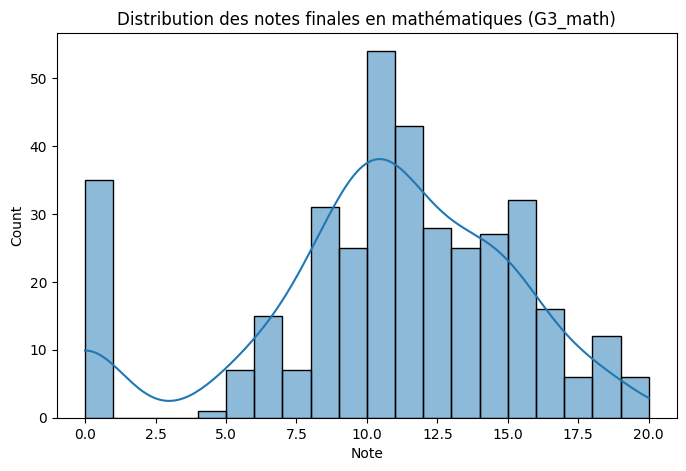

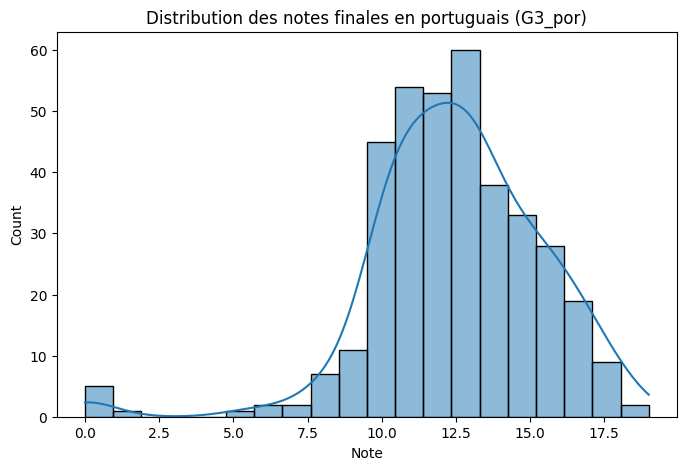

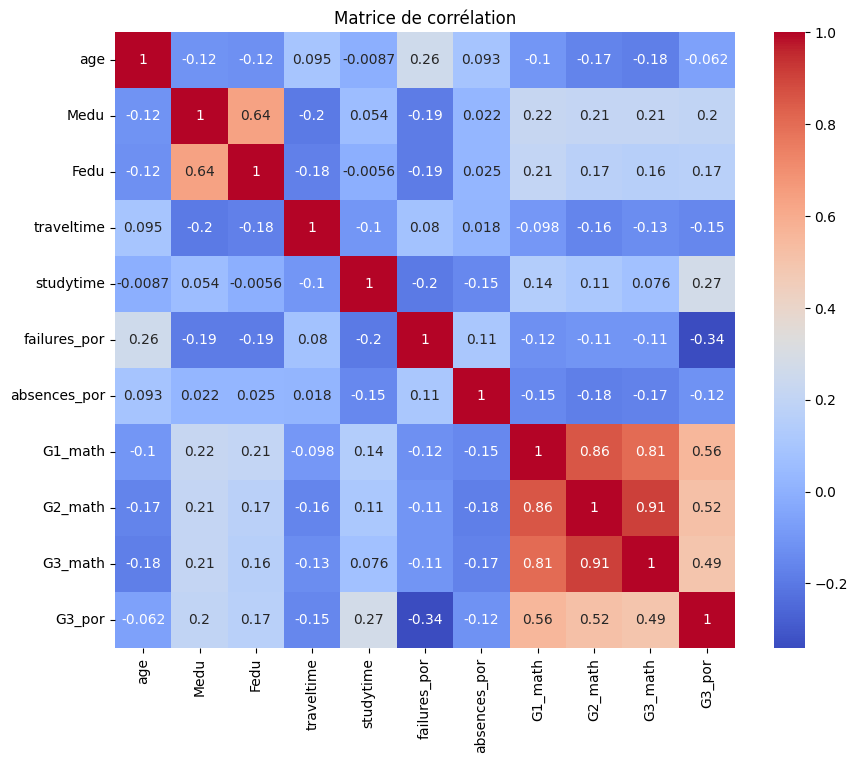

In [16]:
#Deepseek
# Introduction
"""
Prédiction des performances scolaires des étudiants

Ce challenge vise à prédire les notes finales en mathématiques (G3_math) des élèves du secondaire
en fonction de leurs caractéristiques socio-démographiques, habitudes d'étude et historique académique.
Les données incluent des informations sur le contexte familial, l'école, les absences, et les notes intermédiaires.
"""

# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Chargement des données
df = pd.read_csv('/student_final.csv', sep=';')

# Exploration initiale
print("Dimensions des données :", df.shape)
print("\nVariables disponibles :\n", df.columns.tolist())
print("\nExemple de données :\n", df.head())

# Distribution de la variable cible
plt.figure(figsize=(8, 5))
sns.histplot(df['G3_math'], bins=20, kde=True)
plt.title("Distribution des notes finales en mathématiques (G3_math)")
plt.xlabel("Note")
plt.show()

# Distribution de la variable cible
plt.figure(figsize=(8, 5))
sns.histplot(df['G3_por'], bins=20, kde=True)
plt.title("Distribution des notes finales en portuguais (G3_por)")
plt.xlabel("Note")
plt.show()

# Analyse des corrélations
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures_por',
                     'absences_por', 'G1_math', 'G2_math','G3_math']
corr_matrix = df[numerical_features + ['G3_por']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# Préprocessing des données
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                       'famsup', 'activities', 'nursery', 'higher', 'internet',
                       'romantic']

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    (StandardScaler(), numerical_features),
    remainder='passthrough'
)



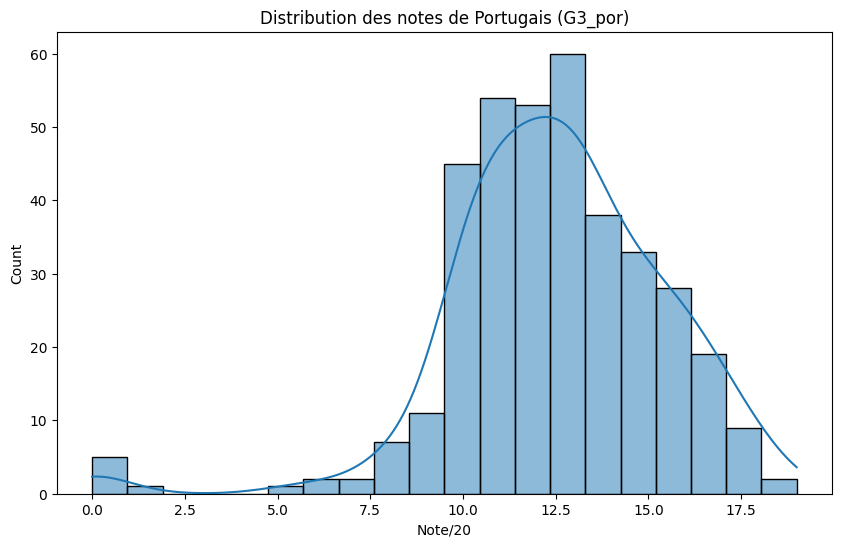

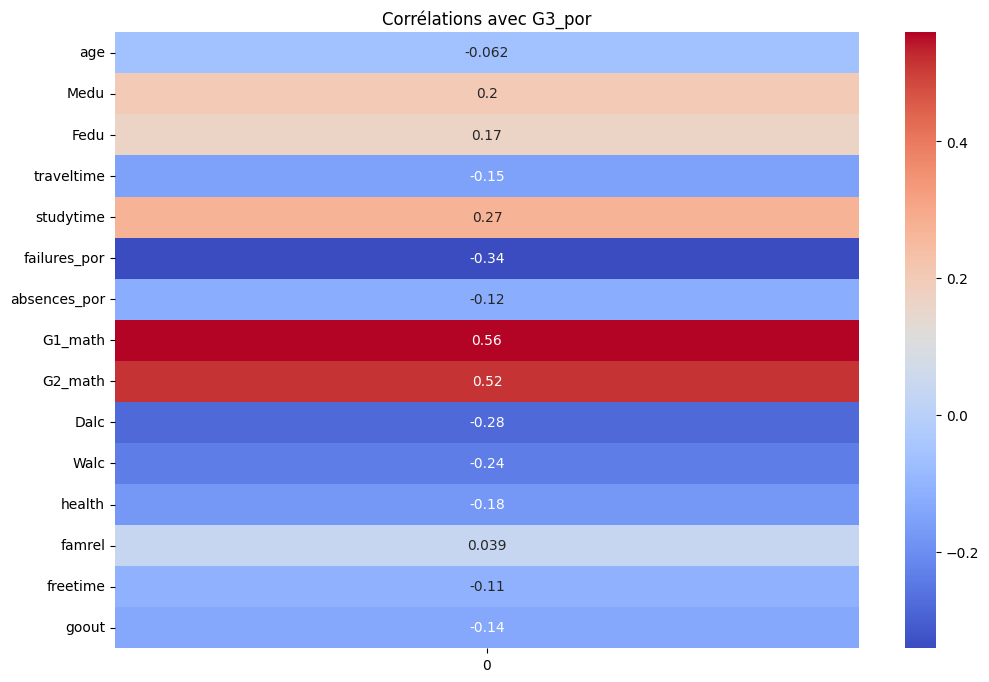

R² moyen sur 5 folds: 0.37 ± 0.09


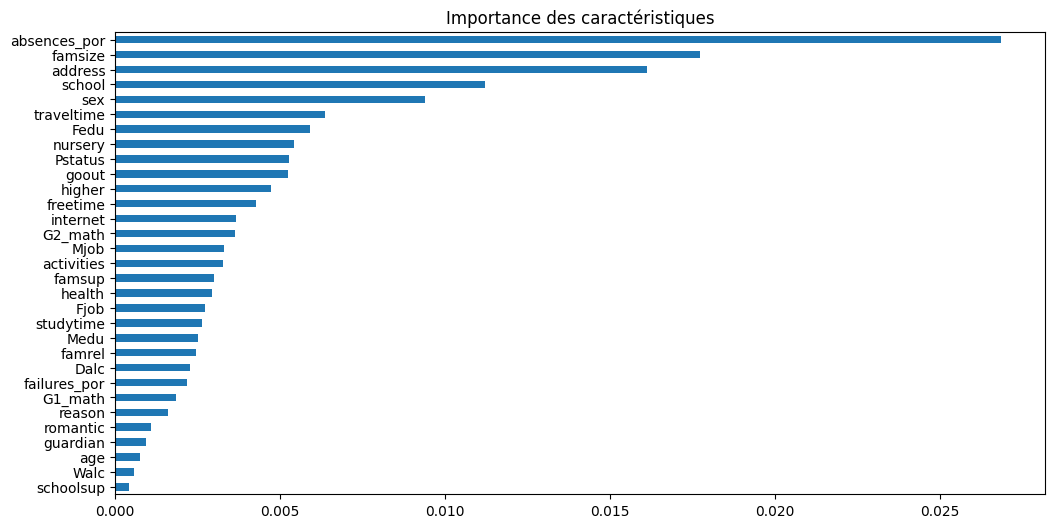

In [17]:
#Deepseek 2

# Introduction
"""
Prédiction des notes finales en Portugais (G3_por)

Ce challenge vise à prédire les notes finales en Portugais des élèves du secondaire
en utilisant toutes les caractéristiques disponibles sauf G3_por.
L'analyse exploratoire révèlera les facteurs clés influençant les performances en Portugais.
"""

# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Chargement des données
df = pd.read_csv('/student_final.csv', sep=';')

# 1. Préparation des données
X = df.drop('G3_por', axis=1)  # Conserve toutes les features sauf la cible
y = df['G3_por']

# 2. Analyse exploratoire
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution des notes de Portugais (G3_por)")
plt.xlabel("Note/20")
plt.show()

# Corrélations avec les variables continues
numerical_features = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
    'failures_por', 'absences_por', 'G1_math', 'G2_math',
    'Dalc', 'Walc', 'health', 'famrel', 'freetime', 'goout'
]

plt.figure(figsize=(12, 8))
sns.heatmap(X[numerical_features].corrwith(y).to_frame(), annot=True, cmap='coolwarm')
plt.title("Corrélations avec G3_por")
plt.show()

# 3. Préprocessing
categorical_features = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
    'famsup', 'activities', 'nursery', 'higher', 'internet',
    'romantic'
]

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    (StandardScaler(), numerical_features),
    remainder='passthrough'
)

# 4. Modélisation
model = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
)

# 5. Validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² moyen sur 5 folds: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

# 6. Feature Importance (après entraînement complet)
model.fit(X, y)
feature_names = categorical_features + numerical_features
importances = model.named_steps['randomforestregressor'].feature_importances_[:len(feature_names)]

plt.figure(figsize=(12, 6))
pd.Series(importances, index=feature_names).sort_values().plot.barh()
plt.title("Importance des caractéristiques")
plt.show()